In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta

In [3]:
from scripts.downloader import fetch_all_polls

In [5]:
all_polls = fetch_all_polls(cleanup=True, refresh=False)

In [ ]:
all_polls.date_started.max()

In [8]:
all_polls[all_polls.pollster == 'Ipsos MORI'].query('conservative < 26')

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,liberal,plaid_cymru,reform_uk,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value
1,2023-06-14,2023-06-20,Ipsos MORI,Evening Standard,GB,1003,25.0,47.0,13.0,NaN,...,NaN,NaN,2.0,4.0,NaN,NaN,NaN,4.0,lab+22.0,22.0
129,2023-02-22,2023-03-01,Ipsos MORI,Evening Standard,UK,1004,25.0,51.0,9.0,NaN,...,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN,lab+26.0,26.0
207,2022-12-07,2022-12-13,Ipsos MORI,NaN,GB,1007,23.0,49.0,13.0,NaN,...,NaN,NaN,2.0,5.0,NaN,NaN,NaN,4.0,lab+26.0,26.0
1172,2019-05-10,2019-05-14,Ipsos MORI,NaN,GB,1072,25.0,27.0,15.0,NaN,...,NaN,1.0,NaN,4.0,NaN,3.0,NaN,1.0,lab+2.0,2.0
4506,1999-11-19,1999-11-22,Ipsos MORI,The Times,NaN,1935,25.0,55.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,lab+30.0,30.0
4514,1999-09-24,1999-09-27,Ipsos MORI,The Times,NaN,1823,25.0,52.0,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,lab+27.0,27.0
4530,1999-04-23,1999-04-26,Ipsos MORI,The Times,NaN,1966,25.0,56.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,lab+31.0,31.0
4539,1999-01-22,1999-01-25,Ipsos MORI,The Times,NaN,1930,24.0,56.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,lab+32.0,32.0
4553,1998-09-18,1998-09-21,Ipsos MORI,The Times,NaN,1789,24.0,56.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,lab+32.0,32.0
4586,1997-11-21,1997-11-24,Ipsos MORI,The Times,NaN,1879,24.0,56.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,lab+32.0,32.0


In [6]:
all_polls.loc[(all_polls.lead_value >= 10), 'dd_lead'] = 1
all_polls['dd_lead'] = all_polls['dd_lead'].fillna(0)
all_polls['dd_lead_in_row'] = 0
for ix, value in all_polls['dd_lead'].iteritems():
    if value >= 1:
        polls_before = all_polls.iloc[:ix]['dd_lead']
        polls_after = all_polls.iloc[ix:]['dd_lead']
        next_untrue_poll = polls_after[polls_after == 0].index[0]
        after_polls = next_untrue_poll - ix

        if len(polls_before[polls_before == 0]) == 0:
            before_polls = len(polls_before)
        else:
            last_untrue_poll = polls_before[polls_before == 0].index[-1]
            before_polls = (ix - last_untrue_poll) - 1

        total_polls = before_polls + after_polls
        all_polls.loc[ix, 'dd_lead_in_row'] = total_polls
    else:
        total_polls = 0

In [8]:
all_polls.to_clipboard(sep='\t')

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,liberal,plaid_cymru,reform_uk,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value
0,2023-05-11,2023-05-12,Omnisis,NaN,GB,1355,24.0,51.0,10.0,NaN,...,NaN,NaN,6.0,3.0,NaN,NaN,NaN,NaN,lab+27.0,27.0
86,2023-02-26,2023-02-26,Redfield & Wilton Strategies,NaN,GB,2000,24.0,51.0,9.0,NaN,...,NaN,NaN,7.0,3.0,NaN,NaN,NaN,1.0,lab+27.0,27.0
96,2023-02-18,2023-02-18,Redfield & Wilton Strategies,NaN,GB,2000,24.0,51.0,10.0,NaN,...,NaN,NaN,6.0,3.0,NaN,NaN,NaN,1.0,lab+27.0,27.0
101,2023-02-15,2023-02-15,PeoplePolling,GB News,UK,1148,21.0,48.0,8.0,NaN,...,NaN,NaN,7.0,5.0,NaN,NaN,NaN,4.0,lab+27.0,27.0
102,2023-02-14,2023-02-15,YouGov,The Times,GB,2062,22.0,50.0,9.0,NaN,...,NaN,1.0,7.0,4.0,NaN,NaN,NaN,1.0,lab+28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,1994-05-30,1994-05-30,Gallup,Telegraph,NaN,NaN,21.0,54.0,21.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lab+32.5,32.5
5186,1990-03-23,1990-03-23,ICM Research,NaN,NaN,NaN,28.0,55.0,7.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,lab+27.0,27.0
5187,1990-03-22,1990-03-22,Harris Interactive,The Observer,NaN,NaN,29.0,57.0,6.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,lab+28.0,28.0
5747,1982-06-23,1982-06-23,Gallup,The Daily Telegraph,NaN,NaN,51.0,24.0,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,con+27.0,27.0


In [11]:
all_polls[all_polls.pollster == 'Gallup']

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,reform_uk,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,dd_lead,dd_lead_in_row
4314,2001-06-06,2001-06-06,Gallup,The Daily Telegraph,NaN,2399,30.0,47.0,18.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lab+17.0,17.0,1.0,45
4325,2001-05-28,2001-05-29,Gallup,The Daily Telegraph,NaN,1462,31.0,47.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lab+16.0,16.0,1.0,45
4329,2001-05-21,2001-05-23,Gallup,The Daily Telegraph,NaN,1000,32.0,48.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lab+16.0,16.0,1.0,45
4333,2001-05-20,2001-05-20,Gallup,BES,NaN,?,25.0,55.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lab+30.0,30.0,1.0,45
4336,2001-05-14,2001-05-15,Gallup,The Daily Telegraph,NaN,1004,32.0,48.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,lab+16.0,16.0,1.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6129,1970-12-13,1970-12-13,Gallup,The Daily Telegraph,NaN,NaN,46.0,44.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,con+1.5,1.5,0.0,0
6130,1970-11-15,1970-11-15,Gallup,The Daily Telegraph,NaN,NaN,43.5,48.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,lab+4.5,4.5,0.0,0
6131,1970-10-18,1970-10-18,Gallup,The Daily Telegraph,NaN,NaN,46.5,46.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tie,0.0,0.0,0
6132,1970-09-13,1970-09-13,Gallup,The Daily Telegraph,NaN,NaN,46.5,44.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,con+2.5,2.5,0.0,0


In [5]:
all_polls.to_csv('poll_database/poll_database.csv', index=False)
all_polls.to_excel('poll_database/poll_database.xlsx', index=False)
all_polls.to_json('poll_database/poll_database.json', index=False, orient='split')

In [6]:
display_columns = ['date_started', 'date_concluded', 'pollster', 'conservative', 'labour', 'liberal_democrat', 'lead']

In [7]:
all_polls['anti_conservative'] = all_polls[
    ['labour', 'liberal_democrat', 'green', 'scottish_national_party', 'plaid_cymru']].fillna(0).sum(axis=1)

In [92]:
all_polls

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,Lab+Con_rolling_max,Lab+Con_rolling_min_max_diff,Con_rolling,Con_rolling_min,Con_rolling_max,Con_rolling_min_max_diff,Lab_rolling,Lab_rolling_min,Lab_rolling_max,Lab_rolling_min_max_diff
0,2023-03-22,2023-03-23,Techne UK,NaN,UK,1624,31.0,46.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-22,2023-03-22,PeoplePolling,GB News,UK,1175,22.0,43.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-17,2023-03-20,Survation,NaN,UK,812,31.0,46.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-17,2023-03-20,Deltapoll,NaN,GB,1054,35.0,45.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-19,2023-03-19,Redfield & Wilton Strategies,NaN,GB,2000,26.0,47.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,1970-11-15,1970-11-15,Gallup,The Daily Telegraph,NaN,NaN,43.5,48.0,NaN,NaN,...,92.5,4.5,40.915,33.5,46.0,12.5,48.865,44.5,55.0,10.5
6102,1970-10-18,1970-10-18,Gallup,The Daily Telegraph,NaN,NaN,46.5,46.5,NaN,NaN,...,93.0,5.0,41.000,33.5,46.5,13.0,48.850,44.5,55.0,10.5
6103,1970-09-13,1970-09-13,Gallup,The Daily Telegraph,NaN,NaN,46.5,44.0,NaN,NaN,...,93.0,5.0,41.150,33.5,46.5,13.0,48.825,44.0,55.0,11.0
6104,1970-08-16,1970-08-16,Gallup,The Daily Telegraph,NaN,NaN,47.0,43.5,NaN,NaN,...,93.0,5.0,41.525,33.5,47.0,13.5,48.575,43.5,55.0,11.5


In [175]:
all_polls.query("green>=11")[display_columns+['green']]

Text(0.5, 1.0, 'Green')

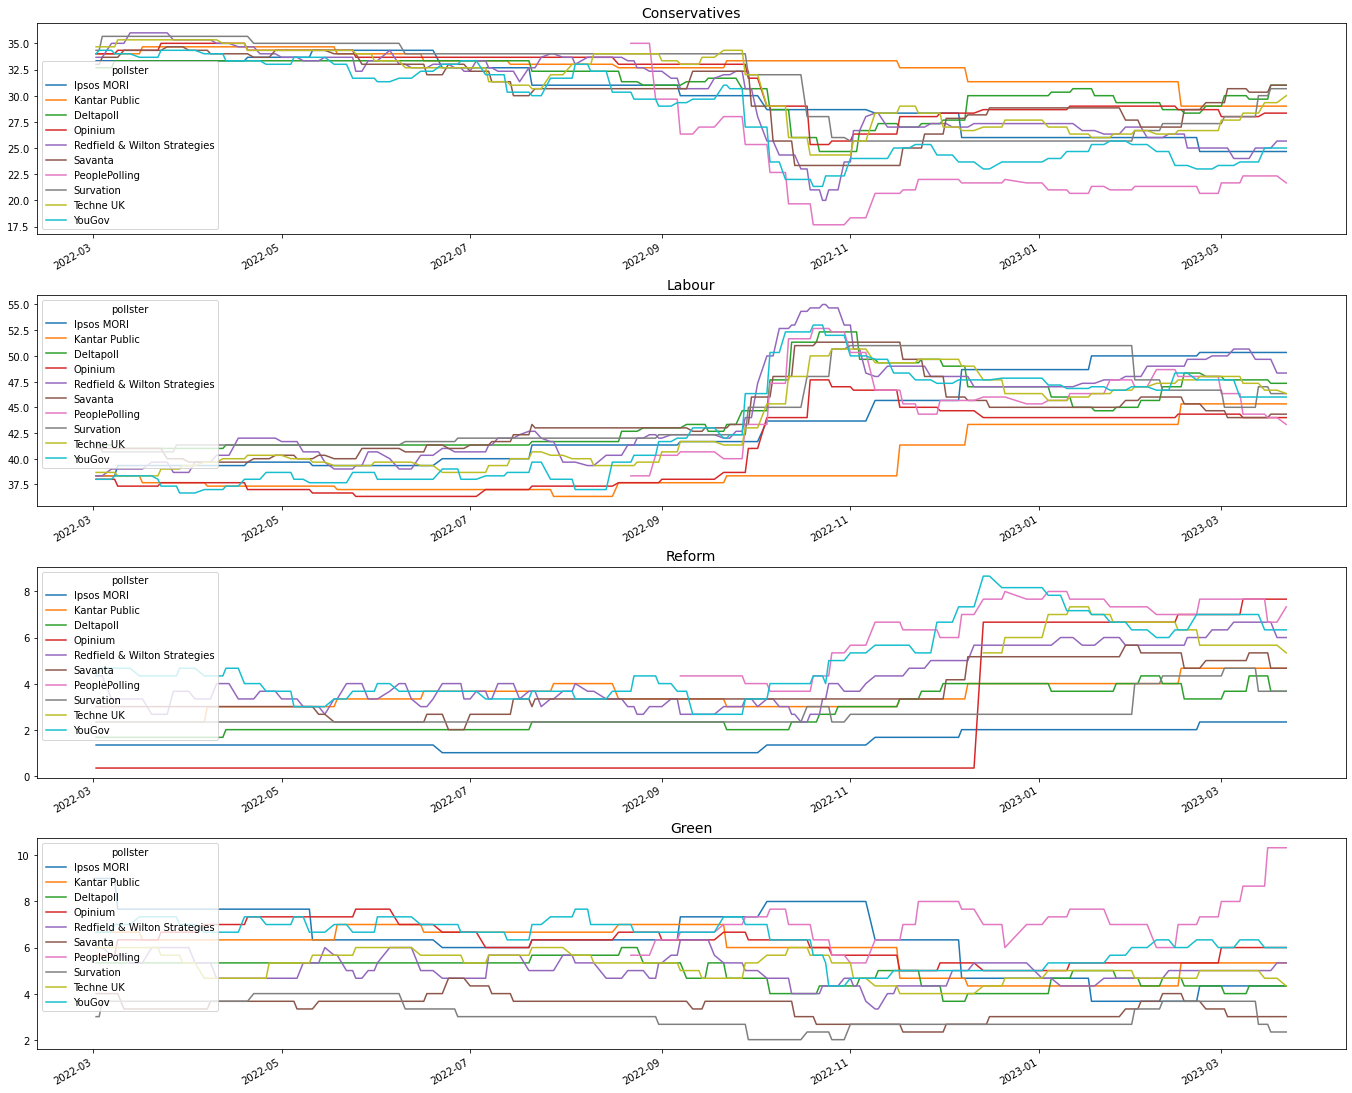

In [179]:
all_polls.query("green<3")[display_columns+['green']]

<AxesSubplot:xlabel='date_started'>

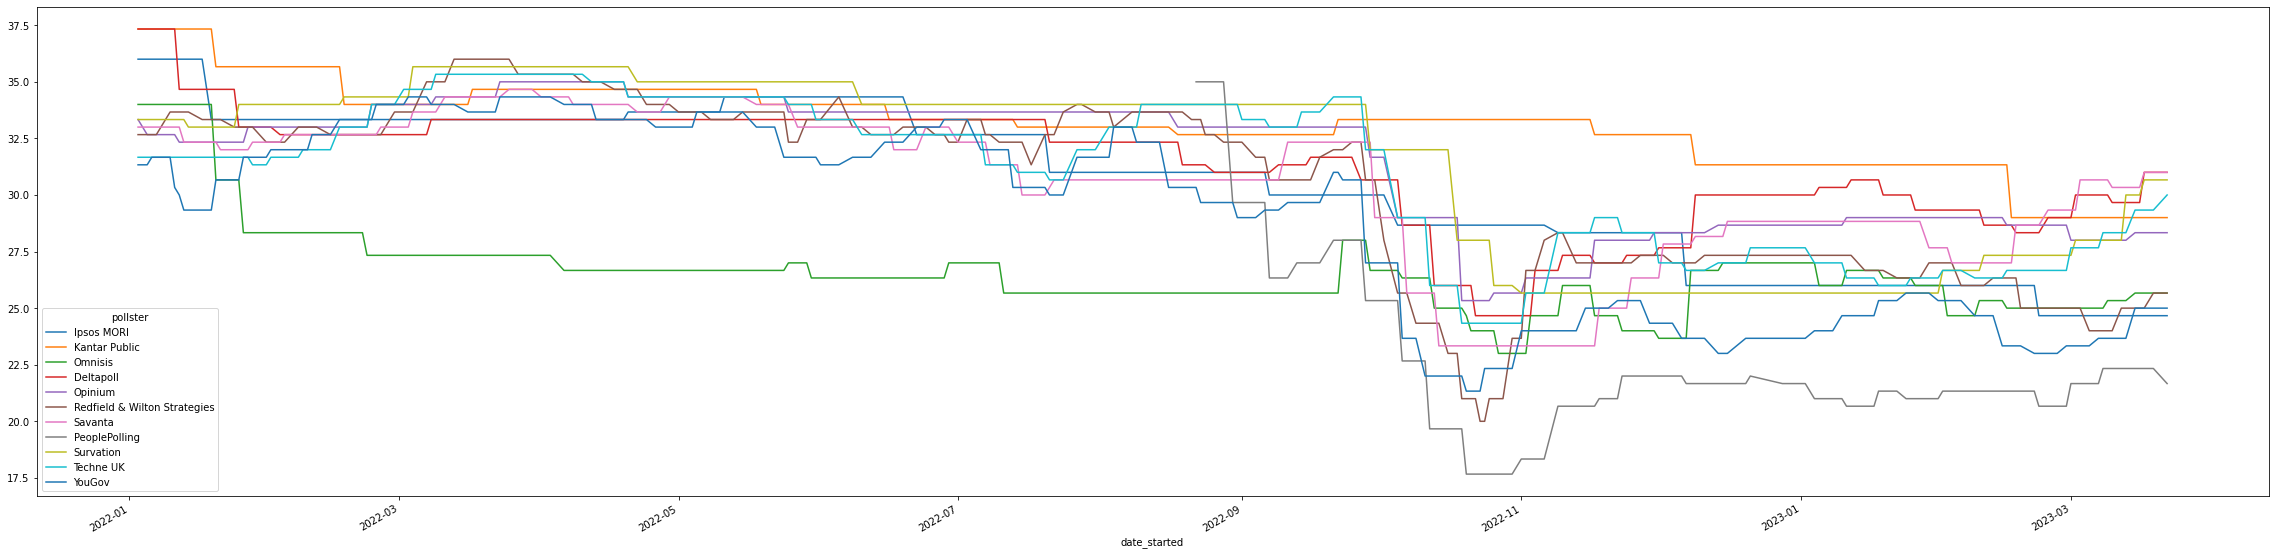

In [155]:
all_polls.query('client == "Sam Freedman"')[display_columns]

In [148]:
all_polls.query('date_concluded <= "2010-05-06" and date_concluded >= "2005-05-05" and lead_value >= 25')[display_columns]

<AxesSubplot:xlabel='date_started'>

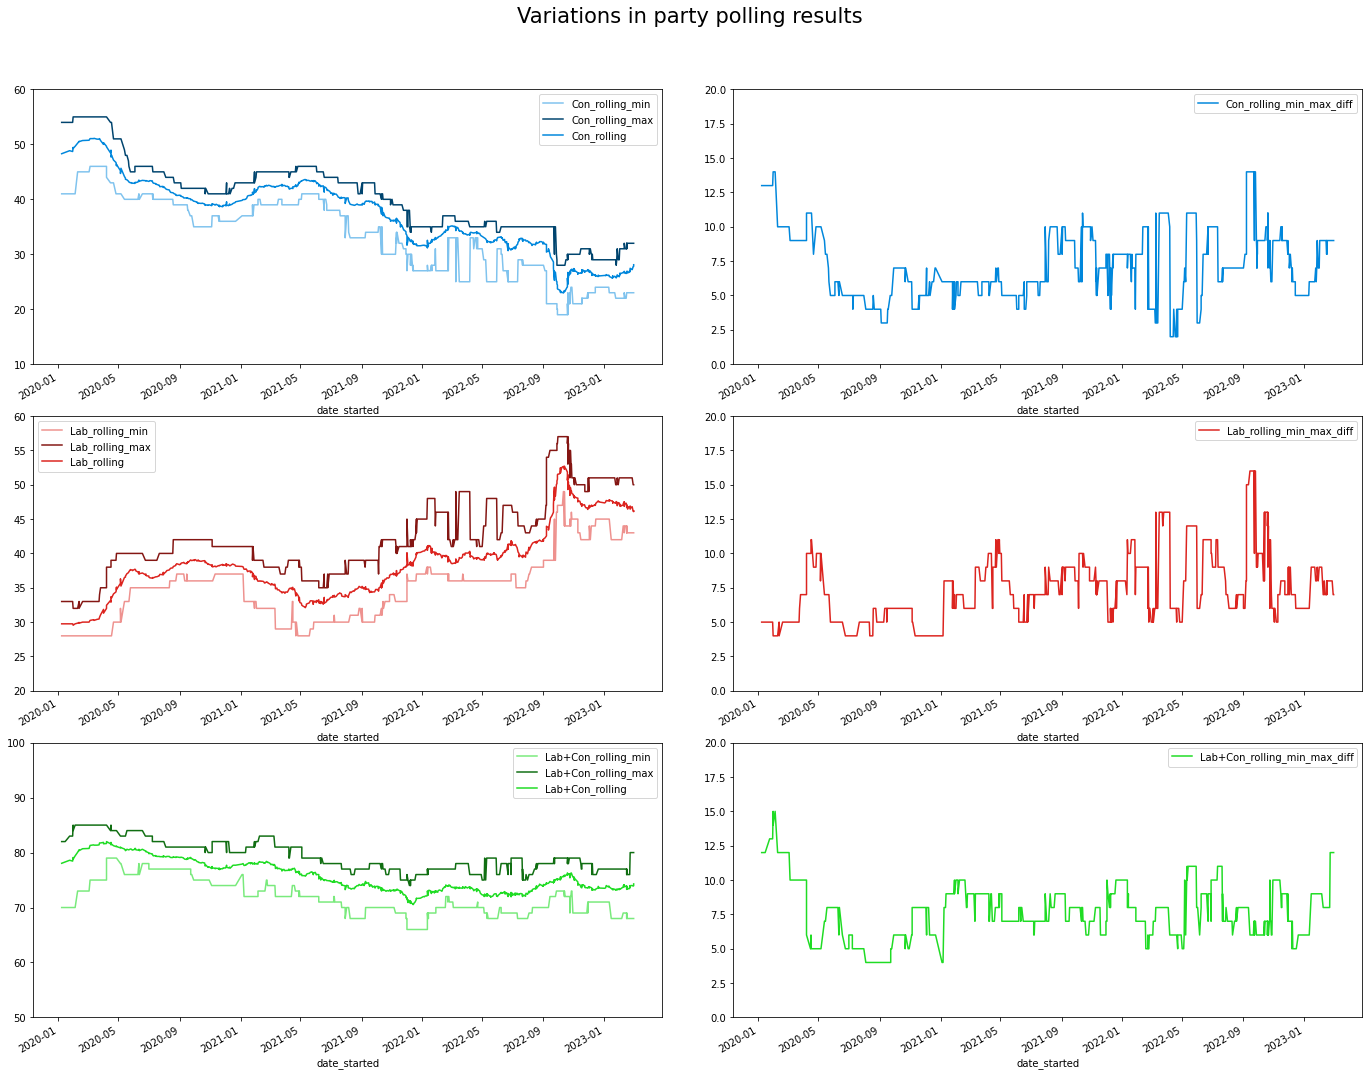

In [113]:
all_polls.query('date_concluded <= "2010-05-06" and date_concluded >= "2005-05-05" and labour <= 20')[display_columns]

In [105]:
all_polls.query('date_concluded <= "2010-05-06" and date_concluded >= "2005-05-05" and liberal_democrat >= 32')[display_columns]

In [14]:
all_polls.query("liberal_democrat + 4 > conservative")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
148,2022-10-20,2022-10-20,PeoplePolling,14.0,53.0,11.0,lab+39.0
1008,2019-07-23,2019-07-24,YouGov,25.0,19.0,23.0,con+2.0
1018,2019-06-24,2019-06-25,YouGov,22.0,20.0,19.0,Tie
1022,2019-06-18,2019-06-19,YouGov,20.0,20.0,21.0,bre+2.0
1023,2019-06-13,2019-06-14,YouGov,21.0,21.0,19.0,bre+3.0
1024,2019-06-09,2019-06-10,YouGov,17.0,19.0,22.0,bre+4.0
1027,2019-06-05,2019-06-06,YouGov,18.0,20.0,20.0,bre+6.0
1028,2019-06-04,2019-06-05,YouGov,18.0,19.0,22.0,bre+3.0
1029,2019-05-31,2019-06-01,YouGov,18.0,19.0,23.0,Tie
1031,2019-05-28,2019-05-30,Opinium,17.0,22.0,16.0,bre+4.0


In [15]:
all_polls.query("pollster == 'YouGov' and green<brexit_party")[display_columns + ['green', 'reform_uk', 'brexit_party']]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead,green,reform_uk,brexit_party
722,2020-11-04,2020-11-05,YouGov,35.0,40.0,7.0,lab+5.0,4.0,NaN,6.0
896,2019-11-25,2019-11-26,YouGov,43.0,32.0,13.0,con+11.0,2.0,NaN,4.0
906,2019-11-12,2019-11-20,YouGov,43.0,29.0,15.0,con+14.0,3.0,NaN,4.0
916,2019-11-14,2019-11-15,YouGov,45.0,28.0,15.0,con+17.0,3.0,NaN,4.0
930,2019-11-07,2019-11-08,YouGov,39.0,26.0,17.0,con+13.0,4.0,NaN,10.0
931,2019-11-05,2019-11-06,YouGov,36.0,25.0,17.0,con+11.0,5.0,NaN,11.0
933,2019-11-01,2019-11-04,YouGov,38.0,25.0,16.0,con+13.0,5.0,NaN,11.0
937,2019-10-30,2019-11-01,YouGov,39.0,27.0,16.0,con+12.0,4.0,NaN,7.0
941,2019-10-29,2019-10-30,YouGov,36.0,21.0,18.0,con+15.0,6.0,NaN,13.0
944,2019-10-17,2019-10-28,YouGov,36.0,22.0,19.0,con+14.0,6.0,NaN,12.0


In [16]:
all_polls[(all_polls.anti_conservative.fillna(0)) >= 15][
    ['date_concluded', 'pollster', 'labour', 'liberal_democrat', 'green', 'scottish_national_party', 'plaid_cymru',
     'anti_conservative', 'lead']]

,date_concluded,pollster,labour,liberal_democrat,green,scottish_national_party,plaid_cymru,anti_conservative,lead
0,2023-02-27,Deltapoll,46.0,8.0,NaN,NaN,NaN,54.0,lab+15.0
1,2023-02-26,Redfield & Wilton Strategies,51.0,9.0,5.0,3.0,NaN,68.0,lab+27.0
2,2023-02-23,BMG Research,46.0,9.0,4.0,NaN,NaN,59.0,lab+17.0
3,2023-02-23,Omnisis,48.0,10.0,5.0,4.0,NaN,67.0,lab+24.0
4,2023-02-23,Techne UK,49.0,8.0,5.0,3.0,NaN,65.0,lab+22.0
...,...,...,...,...,...,...,...,...,...
6067,1970-11-15,Gallup,48.0,NaN,NaN,NaN,NaN,48.0,lab+4.5
6068,1970-10-18,Gallup,46.5,NaN,NaN,NaN,NaN,46.5,Tie
6069,1970-09-13,Gallup,44.0,NaN,NaN,NaN,NaN,44.0,con+2.5
6070,1970-08-16,Gallup,43.5,NaN,NaN,NaN,NaN,43.5,con+3.5


In [17]:
all_polls.query("labour>conservative and lead_value>=35")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
145,2022-10-20,2022-10-21,YouGov,19.0,56.0,10.0,lab+37.0
148,2022-10-20,2022-10-20,PeoplePolling,14.0,53.0,11.0,lab+39.0
149,2022-10-20,2022-10-20,Omnisis,22.0,57.0,7.0,lab+35.0
151,2022-10-19,2022-10-19,Redfield & Wilton Strategies,19.0,55.0,12.0,lab+36.0
154,2022-10-16,2022-10-16,Redfield & Wilton Strategies,20.0,56.0,11.0,lab+36.0
4453,1997-11-27,1997-12-03,Gallup,21.0,57.0,17.0,lab+36.0
4457,1997-10-30,1997-11-04,Gallup,23.0,63.0,11.0,lab+40.0
4458,1997-10-24,1997-10-27,Ipsos MORI,24.0,60.0,12.0,lab+36.0
4459,1997-10-06,1997-10-06,ICM Research,23.0,59.0,13.0,lab+36.0
4460,1997-09-25,1997-10-01,Gallup,22.0,60.0,14.0,lab+38.0


In [18]:
all_polls.query("labour>55")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
144,2022-10-21,2022-10-22,Omnisis,22.0,56.0,10.0,lab+34.0
145,2022-10-20,2022-10-21,YouGov,19.0,56.0,10.0,lab+37.0
149,2022-10-20,2022-10-20,Omnisis,22.0,57.0,7.0,lab+35.0
154,2022-10-16,2022-10-16,Redfield & Wilton Strategies,20.0,56.0,11.0,lab+36.0
4379,1999-10-22,1999-10-25,Ipsos MORI,28.0,56.0,11.0,lab+28.0
...,...,...,...,...,...,...,...
4690,1994-08-22,1994-08-22,Ipsos MORI,23.0,56.0,18.0,lab+33.0
4692,1994-08-01,1994-08-01,Gallup,23.0,56.5,14.5,lab+33.5
5094,1990-04-07,1990-04-07,ICM Research,32.0,56.0,4.0,lab+24.0
5100,1990-03-22,1990-03-22,Harris Interactive,29.0,57.0,6.0,lab+28.0


In [19]:
all_polls.query("pollster=='Ipsos MORI' and labour>conservative and lead_value>=35")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
4458,1997-10-24,1997-10-27,Ipsos MORI,24.0,60.0,12.0,lab+36.0
4656,1995-05-22,1995-05-22,Ipsos MORI,22.0,58.0,16.0,lab+36.0
4673,1994-12-19,1994-12-19,Ipsos MORI,22.0,61.0,13.0,lab+39.0


In [20]:
all_polls.query("pollster=='ICM Research'")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
872,2019-12-06,2019-12-09,ICM Research,42.0,36.0,12.0,con+6.0
886,2019-11-29,2019-12-02,ICM Research,42.0,35.0,13.0,con+7.0
897,2019-11-22,2019-11-25,ICM Research,41.0,34.0,13.0,con+7.0
911,2019-11-15,2019-11-18,ICM Research,42.0,32.0,13.0,con+10.0
922,2019-11-08,2019-11-11,ICM Research,39.0,31.0,15.0,con+8.0
...,...,...,...,...,...,...,...
5183,1989-05-13,1989-05-13,ICM Research,43.0,43.0,8.0,Tie
5189,1989-04-08,1989-04-08,ICM Research,44.0,40.0,7.0,con+4.0
5196,1989-03-13,1989-03-13,ICM Research,41.0,39.0,8.0,con+2.0
5206,1989-02-11,1989-02-11,ICM Research,42.0,39.0,7.0,con+3.0


In [21]:
all_polls.query("pollster=='Savanta ComRes' and labour >42")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead


In [22]:
all_polls.query("pollster=='Savanta ComRes' and lead_value >= 20")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead


In [23]:
all_polls.query("labour>53")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
139,2022-10-25,2022-10-26,Redfield & Wilton Strategies,23.0,55.0,9.0,lab+32.0
143,2022-10-23,2022-10-23,Redfield & Wilton Strategies,21.0,54.0,11.0,lab+33.0
144,2022-10-21,2022-10-22,Omnisis,22.0,56.0,10.0,lab+34.0
145,2022-10-20,2022-10-21,YouGov,19.0,56.0,10.0,lab+37.0
149,2022-10-20,2022-10-20,Omnisis,22.0,57.0,7.0,lab+35.0
...,...,...,...,...,...,...,...
5101,1990-03-20,1990-03-20,Ipsos MORI,31.0,54.0,6.0,lab+23.0
5722,1980-12-19,1980-12-19,Gallup,32.0,56.0,NaN,lab+24.0
6056,1971-09-20,1971-09-20,Gallup,35.0,54.0,NaN,lab+19.0
6058,1971-07-12,1971-07-12,Gallup,33.5,55.0,NaN,lab+21.5


In [24]:
all_polls.query("conservative<29 and labour>conservative and lead_value>14")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0
3,2023-02-22,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0
4,2023-02-22,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0
5,2023-02-22,2023-02-22,PeoplePolling,20.0,46.0,8.0,lab+26.0
6,2023-02-17,2023-02-20,Deltapoll,28.0,50.0,9.0,lab+22.0
...,...,...,...,...,...,...,...
4754,1993-05-31,1993-05-31,Gallup,25.0,49.0,23.0,lab+24.0
4755,1993-05-24,1993-05-24,Ipsos MORI,28.0,44.0,24.0,lab+16.0
5096,1990-04-02,1990-04-02,Gallup,28.0,52.5,7.5,lab+24.5
5099,1990-03-23,1990-03-23,ICM Research,28.0,55.0,7.0,lab+27.0


In [25]:
all_polls.loc[(all_polls.labour >= 50), 'maj_lead'] = 1
all_polls['maj_lead'] = all_polls['maj_lead'].fillna(0)
all_polls['maj_lead_in_row'] = 0
for ix, value in all_polls['maj_lead'].iteritems():
    if value >= 1:
        polls_before = all_polls.iloc[:ix]['maj_lead']
        polls_after = all_polls.iloc[ix:]['maj_lead']
        next_untrue_poll = polls_after[polls_after == 0].index[0]
        after_polls = next_untrue_poll - ix

        if len(polls_before[polls_before == 0]) == 0:
            before_polls = len(polls_before)
        else:
            last_untrue_poll = polls_before[polls_before == 0].index[-1]
            before_polls = (ix - last_untrue_poll) - 1

        total_polls = before_polls + after_polls
        all_polls.loc[ix, 'maj_lead_in_row'] = total_polls
    else:
        total_polls = 0

In [26]:
all_polls[all_polls['maj_lead_in_row'] > 5][
    ['date_concluded', 'pollster', 'conservative', 'labour', 'liberal_democrat', 'lead',
     'maj_lead_in_row']].to_clipboard(sep='\t')

In [27]:
all_polls

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,anti_conservative,maj_lead,maj_lead_in_row
0,2023-02-24,2023-02-27,Deltapoll,NaN,GB,1060,31.0,46.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,lab+15.0,15.0,54.0,0.0,0
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,NaN,GB,2000,24.0,51.0,9.0,NaN,...,3.0,NaN,NaN,NaN,1.0,lab+27.0,27.0,68.0,1.0,1
2,2023-02-21,2023-02-23,BMG Research,NaN,GB,TBC,29.0,46.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,lab+17.0,17.0,59.0,0.0,0
3,2023-02-22,2023-02-23,Omnisis,NaN,GB,1248,24.0,48.0,10.0,NaN,...,4.0,NaN,NaN,NaN,1.0,lab+24.0,24.0,67.0,0.0,0
4,2023-02-22,2023-02-23,Techne UK,NaN,GB,1633,27.0,49.0,8.0,NaN,...,3.0,NaN,NaN,NaN,3.0,lab+22.0,22.0,65.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,1970-11-15,1970-11-15,Gallup,The Daily Telegraph,NaN,NaN,43.5,48.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,lab+4.5,4.5,48.0,0.0,0
6068,1970-10-18,1970-10-18,Gallup,The Daily Telegraph,NaN,NaN,46.5,46.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tie,0.0,46.5,0.0,0
6069,1970-09-13,1970-09-13,Gallup,The Daily Telegraph,NaN,NaN,46.5,44.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,con+2.5,2.5,44.0,0.0,0
6070,1970-08-16,1970-08-16,Gallup,The Daily Telegraph,NaN,NaN,47.0,43.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,con+3.5,3.5,43.5,0.0,0


In [28]:
all_polls.loc[(all_polls.labour > all_polls.conservative) & (all_polls.lead_value >= 10), 'dd_lead'] = 1
all_polls['dd_lead'] = all_polls['dd_lead'].fillna(0)

In [29]:
all_polls.loc[(all_polls.lead_value >= 10), 'dd_lead'] = 1
all_polls['dd_lead'] = all_polls['dd_lead'].fillna(0)

In [30]:
all_polls['dd_in_row'] = 0

In [31]:
for ix, value in all_polls['dd_lead'].iteritems():
    if value >= 1:
        polls_before = all_polls.iloc[:ix]['dd_lead']
        polls_after = all_polls.iloc[ix:]['dd_lead']
        next_untrue_poll = polls_after[polls_after == 0].index[0]
        after_polls = next_untrue_poll - ix

        if len(polls_before[polls_before == 0]) == 0:
            before_polls = len(polls_before)
        else:
            last_untrue_poll = polls_before[polls_before == 0].index[-1]
            before_polls = (ix - last_untrue_poll) - 1

        total_polls = before_polls + after_polls
        all_polls.loc[ix, 'dd_in_row'] = total_polls
    else:
        total_polls = 0



In [32]:
all_polls[all_polls['dd_in_row'] > 22][
    ['date_concluded', 'pollster', 'conservative', 'labour', 'liberal_democrat', 'lead', 'dd_in_row']]

,date_concluded,pollster,conservative,labour,liberal_democrat,lead,dd_in_row
0,2023-02-27,Deltapoll,31.0,46.0,8.0,lab+15.0,184
1,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0,184
2,2023-02-23,BMG Research,29.0,46.0,9.0,lab+17.0,184
3,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0,184
4,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0,184
...,...,...,...,...,...,...,...
5611,1983-05-24,Gallup,45.0,32.0,NaN,con+13.0,43
5612,1983-05-23,Audience Selection,48.0,33.0,NaN,con+15.0,43
5613,1983-05-23,Ipsos MORI,45.0,32.0,NaN,con+13.0,43
5614,1983-05-23,NOP,51.0,33.0,NaN,con+18.0,43


In [33]:
polls_after

6063    1.0
6064    0.0
6065    0.0
6066    0.0
6067    0.0
6068    0.0
6069    0.0
6070    0.0
6071    0.0
Name: dd_lead, dtype: float64

In [34]:
before_polls

0

In [35]:
polls_after



6063    1.0
6064    0.0
6065    0.0
6066    0.0
6067    0.0
6068    0.0
6069    0.0
6070    0.0
6071    0.0
Name: dd_lead, dtype: float64

In [36]:
polls_before[polls_before == 0]

184     0.0
189     0.0
190     0.0
191     0.0
195     0.0
       ... 
6053    0.0
6054    0.0
6057    0.0
6061    0.0
6062    0.0
Name: dd_lead, Length: 4100, dtype: float64

In [37]:
all_polls.query("pollster=='Savanta ComRes' and labour>conservative and lead_value>=14")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead


In [38]:
all_polls.query("lead_value >= 15 and labour>conservative")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
0,2023-02-24,2023-02-27,Deltapoll,31.0,46.0,8.0,lab+15.0
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0
2,2023-02-21,2023-02-23,BMG Research,29.0,46.0,9.0,lab+17.0
3,2023-02-22,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0
4,2023-02-22,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0
...,...,...,...,...,...,...,...
5979,1974-04-16,1974-04-16,Gallup,33.0,49.0,NaN,lab+16.0
6028,1973-05-06,1973-05-06,NOP,31.9,50.1,NaN,lab+18.2
6056,1971-09-20,1971-09-20,Gallup,35.0,54.0,NaN,lab+19.0
6058,1971-07-12,1971-07-12,Gallup,33.5,55.0,NaN,lab+21.5


In [39]:
all_polls.query("lead_value >= 18 and labour>conservative")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0
3,2023-02-22,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0
4,2023-02-22,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0
5,2023-02-22,2023-02-22,PeoplePolling,20.0,46.0,8.0,lab+26.0
6,2023-02-17,2023-02-20,Deltapoll,28.0,50.0,9.0,lab+22.0
...,...,...,...,...,...,...,...
5722,1980-12-19,1980-12-19,Gallup,32.0,56.0,NaN,lab+24.0
6028,1973-05-06,1973-05-06,NOP,31.9,50.1,NaN,lab+18.2
6056,1971-09-20,1971-09-20,Gallup,35.0,54.0,NaN,lab+19.0
6058,1971-07-12,1971-07-12,Gallup,33.5,55.0,NaN,lab+21.5


In [40]:
all_polls.query("conservative <29")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0
3,2023-02-22,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0
4,2023-02-22,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0
5,2023-02-22,2023-02-22,PeoplePolling,20.0,46.0,8.0,lab+26.0
6,2023-02-17,2023-02-20,Deltapoll,28.0,50.0,9.0,lab+22.0
...,...,...,...,...,...,...,...
5692,1981-09-28,1981-09-28,Ipsos MORI,28.0,42.0,NaN,lab+14.0
5693,1981-09-18,1981-09-18,Gallup,27.0,38.0,NaN,lab+5.0
5696,1981-08-17,1981-08-17,NOP,28.0,38.5,NaN,lab+6.0
5714,1981-03-23,1981-03-23,Gallup,28.0,38.0,NaN,lab+6.0


In [41]:
all_polls.query("pollster=='YouGov' and liberal_democrat > 54")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead


In [42]:
all_polls.query("pollster=='Ipsos MORI' and liberal_democrat >=15")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
269,2022-06-22,2022-06-29,Ipsos MORI,30.0,41.0,15.0,lab+11.0
908,2019-11-15,2019-11-19,Ipsos MORI,44.0,28.0,16.0,con+16.0
943,2019-10-25,2019-10-28,Ipsos MORI,41.0,24.0,20.0,con+17.0
971,2019-09-13,2019-09-16,Ipsos MORI,33.0,24.0,23.0,con+9.0
1002,2019-07-26,2019-07-30,Ipsos MORI,34.0,24.0,20.0,con+10.0
...,...,...,...,...,...,...,...
4966,1991-05-28,1991-05-28,Ipsos MORI,37.0,43.0,16.0,lab+6.0
4978,1991-04-22,1991-04-22,Ipsos MORI,42.0,40.0,15.0,con+2.0
4984,1991-03-25,1991-03-25,Ipsos MORI,40.0,40.0,16.0,Tie
4986,1991-03-22,1991-03-22,Ipsos MORI,38.0,44.0,15.0,lab+6.0


In [43]:
all_polls.query("pollster=='YouGov' and liberal_democrat >12")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
237,2022-07-27,2022-07-28,YouGov,34.0,35.0,13.0,lab+1.0
253,2022-07-13,2022-07-14,YouGov,29.0,40.0,13.0,lab+11.0
261,2022-07-06,2022-07-07,YouGov,29.0,40.0,15.0,lab+11.0
268,2022-06-28,2022-06-29,YouGov,33.0,36.0,13.0,lab+3.0
417,2022-01-11,2022-01-12,YouGov,28.0,38.0,13.0,lab+10.0
...,...,...,...,...,...,...,...
4207,2003-09-23,2003-09-25,YouGov,32.0,31.0,30.0,con+1.0
4212,2003-07-22,2003-07-24,YouGov,37.0,34.0,22.0,con+3.0
4217,2003-04-22,2003-04-24,YouGov,32.0,40.0,21.0,lab+8.0
4219,2003-03-26,2003-03-27,YouGov,33.0,40.0,20.0,lab+7.0


In [44]:
all_polls.query("labour + green >= 50")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0
2,2023-02-21,2023-02-23,BMG Research,29.0,46.0,9.0,lab+17.0
3,2023-02-22,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0
4,2023-02-22,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0
5,2023-02-22,2023-02-22,PeoplePolling,20.0,46.0,8.0,lab+26.0
...,...,...,...,...,...,...,...
406,2022-01-20,2022-01-20,Omnisis,27.0,45.0,8.0,lab+18.0
407,2022-01-17,2022-01-17,Redfield & Wilton Strategies,30.0,43.0,9.0,lab+13.0
468,2021-11-08,2021-11-08,Omnisis,30.0,42.0,6.0,lab+12.0
2742,2012-11-10,2012-11-13,Ipsos MORI,32.0,46.0,9.0,lab+14.0


In [45]:
all_polls.query("pollster=='Opinium' and labour >= 41")[display_columns]

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
10,2023-02-15,2023-02-17,Opinium,28.0,44.0,9.0,lab+16.0
51,2023-01-11,2023-01-13,Opinium,29.0,45.0,9.0,lab+16.0
71,2022-12-14,2022-12-16,Opinium,29.0,44.0,9.0,lab+15.0
89,2022-11-30,2022-12-02,Opinium,29.0,43.0,8.0,lab+14.0
107,2022-11-17,2022-11-18,Opinium,28.0,45.0,9.0,lab+17.0
122,2022-11-02,2022-11-04,Opinium,28.0,46.0,8.0,lab+18.0
132,2022-10-26,2022-10-28,Opinium,28.0,44.0,10.0,lab+16.0
147,2022-10-19,2022-10-21,Opinium,23.0,50.0,9.0,lab+27.0
167,2022-10-05,2022-10-07,Opinium,26.0,47.0,11.0,lab+21.0
173,2022-09-29,2022-09-30,Opinium,27.0,46.0,9.0,lab+19.0


In [46]:
#all_polls.query("pollster == 'YouGov' and conservative <31")[display_columns]

In [47]:
reporting_date = 'date_started'

In [48]:
most_recent_date = all_polls[reporting_date].max()
one_year_polls = all_polls[
    all_polls[reporting_date] >= (most_recent_date + relativedelta(months=-17)).replace(day=1)].copy()

In [80]:
pollsters_latest = pd.DataFrame()
for pollster in one_year_polls.pollster.unique():
    pollster_data = one_year_polls.query(f'pollster == "{pollster}"')
    latest_poll = pollster_data.iloc[0]
    pollsters_latest = pd.concat([pollsters_latest, latest_poll], axis=0, ignore_index=True)

In [108]:
one_year_polls.groupby('pollster').nth(0).reset_index()

,pollster,date_started,date_concluded,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,reclaim_party,others,lead,lead_value,anti_conservative,maj_lead,maj_lead_in_row,dd_lead,dd_in_row,poll_month
0,BMG Research,2023-02-21,2023-02-23,NaN,GB,TBC,29.0,46.0,9.0,NaN,...,NaN,NaN,lab+17.0,17.0,59.0,0.0,0,1.0,184,2023-02-01
1,Deltapoll,2023-02-24,2023-02-27,NaN,GB,1060,31.0,46.0,8.0,NaN,...,NaN,NaN,lab+15.0,15.0,54.0,0.0,0,1.0,184,2023-02-01
2,Find Out Now,2023-01-27,2023-02-05,Electoral Calculus,GB,28191,23.0,48.0,11.0,NaN,...,NaN,NaN,lab+25.0,25.0,68.0,0.0,0,1.0,184,2023-01-01
3,FocalData,2023-02-10,2023-02-12,NaN,GB,1041,28.0,48.0,9.0,NaN,...,NaN,2.0,lab+20.0,20.0,64.0,0.0,0,1.0,184,2023-02-01
4,Ipsos MORI,2023-01-18,2023-01-25,NaN,UK,1001,26.0,51.0,9.0,NaN,...,NaN,NaN,lab+25.0,25.0,72.0,1.0,2,1.0,184,2023-01-01
5,JL Partners,2022-10-19,2022-10-21,NaN,GB,2000,26.0,51.0,8.0,NaN,...,NaN,4.0,lab+25.0,25.0,67.0,1.0,19,1.0,184,2022-10-01
6,Kantar Public,2023-02-16,2023-02-20,NaN,GB,1120,28.0,45.0,9.0,NaN,...,NaN,NaN,lab+17.0,17.0,66.0,0.0,0,1.0,184,2023-02-01
7,Number Cruncher Politics,2022-02-21,2022-02-28,ITV,UK,2001,35.0,42.0,8.0,NaN,...,NaN,2.0,lab+7.0,7.0,62.0,0.0,0,0.0,0,2022-02-01
8,Omnisis,2023-02-22,2023-02-23,NaN,GB,1248,24.0,48.0,10.0,NaN,...,NaN,1.0,lab+24.0,24.0,67.0,0.0,0,1.0,184,2023-02-01
9,Opinium,2023-02-15,2023-02-17,The Observer,GB,1451,28.0,44.0,9.0,NaN,...,NaN,2.0,lab+16.0,16.0,63.0,0.0,0,1.0,184,2023-02-01


In [104]:
pollsters_latest = one_year_polls.groupby('pollster').nth(1).reset_index()

In [106]:
one_year_polls.query(f'pollster == "Opinium"')

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,reclaim_party,others,lead,lead_value,anti_conservative,maj_lead,maj_lead_in_row,dd_lead,dd_in_row,poll_month
10,2023-02-15,2023-02-17,Opinium,The Observer,GB,1451,28.0,44.0,9.0,NaN,...,NaN,2.0,lab+16.0,16.0,63.0,0.0,0,1.0,184,2023-02-01
51,2023-01-11,2023-01-13,Opinium,The Observer,GB,2000,29.0,45.0,9.0,NaN,...,NaN,2.0,lab+16.0,16.0,63.0,0.0,0,1.0,184,2023-01-01
71,2022-12-14,2022-12-16,Opinium,The Observer,GB,2000,29.0,44.0,9.0,NaN,...,NaN,2.0,lab+15.0,15.0,62.0,0.0,0,1.0,184,2022-12-01
89,2022-11-30,2022-12-02,Opinium,The Observer,GB,2000,29.0,43.0,8.0,NaN,...,NaN,2.0,lab+14.0,14.0,62.0,0.0,0,1.0,184,2022-11-01
107,2022-11-17,2022-11-18,Opinium,The Observer,GB,1484,28.0,45.0,9.0,NaN,...,NaN,3.0,lab+17.0,17.0,61.0,0.0,0,1.0,184,2022-11-01
122,2022-11-02,2022-11-04,Opinium,The Observer,UK,1445,28.0,46.0,8.0,NaN,...,NaN,7.0,lab+18.0,18.0,64.0,0.0,0,1.0,184,2022-11-01
132,2022-10-26,2022-10-28,Opinium,The Observer,UK,1499,28.0,44.0,10.0,NaN,...,NaN,8.0,lab+16.0,16.0,63.0,0.0,0,1.0,184,2022-10-01
147,2022-10-19,2022-10-21,Opinium,The Observer,UK,2023,23.0,50.0,9.0,NaN,...,NaN,6.0,lab+27.0,27.0,68.0,1.0,19,1.0,184,2022-10-01
167,2022-10-05,2022-10-07,Opinium,The Observer,UK,2023,26.0,47.0,11.0,NaN,...,NaN,6.0,lab+21.0,21.0,67.0,0.0,0,1.0,184,2022-10-01
173,2022-09-29,2022-09-30,Opinium,The Observer,UK,1468,27.0,46.0,9.0,NaN,...,NaN,6.0,lab+19.0,19.0,66.0,0.0,0,1.0,184,2022-09-01


In [72]:
pollsters_latest = pd.DataFrame()
for pollster in one_year_polls.pollster.unique():
    pollster_data = one_year_polls.query(f'pollster == "{pollster}"')
    latest_poll = pollster_data.iloc[0]
    pollsters_latest = pollsters_latest.append(latest_poll)

In [103]:
pollsters_latest.sort_values('date_started', ascending=False)

,date_started,date_concluded,client,area,sample_size,conservative,labour,liberal_democrat,alliance,brexit_party,...,reclaim_party,others,lead,lead_value,anti_conservative,maj_lead,maj_lead_in_row,dd_lead,dd_in_row,poll_month
pollster,,,,,,,,,,,,,,,,,,,,,
Redfield & Wilton Strategies,2023-02-18,2023-02-18,NaN,GB,2000,24.0,51.0,10.0,NaN,NaN,...,NaN,1.0,lab+27.0,27.0,69.0,1.0,1,1.0,184,2023-02-01
Deltapoll,2023-02-17,2023-02-20,NaN,GB,1079,28.0,50.0,9.0,NaN,NaN,...,NaN,1.0,lab+22.0,22.0,66.0,1.0,1,1.0,184,2023-02-01
Omnisis,2023-02-15,2023-02-16,NaN,GB,1259,25.0,48.0,10.0,NaN,NaN,...,NaN,1.0,lab+23.0,23.0,66.0,0.0,0,1.0,184,2023-02-01
Techne UK,2023-02-15,2023-02-16,NaN,GB,1631,27.0,48.0,8.0,NaN,NaN,...,NaN,3.0,lab+21.0,21.0,64.0,0.0,0,1.0,184,2023-02-01
PeoplePolling,2023-02-15,2023-02-15,GB News,UK,1148,21.0,48.0,8.0,NaN,NaN,...,NaN,4.0,lab+27.0,27.0,69.0,0.0,0,1.0,184,2023-02-01
YouGov,2023-02-14,2023-02-15,The Times,GB,2062,22.0,50.0,9.0,NaN,NaN,...,NaN,1.0,lab+28.0,28.0,70.0,1.0,1,1.0,184,2023-02-01
Savanta,2023-02-10,2023-02-12,NaN,UK,2175,28.0,45.0,10.0,NaN,NaN,...,NaN,4.0,lab+17.0,17.0,62.0,0.0,0,1.0,184,2023-02-01
BMG Research,2023-01-24,2023-01-26,NaN,GB,1502,29.0,45.0,9.0,NaN,NaN,...,NaN,2.0,lab+16.0,16.0,62.0,0.0,0,1.0,184,2023-01-01
FocalData,2023-01-17,2023-01-18,Sam Freedman,GB,1028,24.0,49.0,9.0,NaN,NaN,...,NaN,4.0,lab+25.0,25.0,65.0,0.0,0,1.0,184,2023-01-01


In [50]:
top_five = {'Ipsos MORI': 100,
            'Opinium': 79,
            'YouGov': 77,
            'Kantar Public': 69,
            'Number Cruncher Politics': 61,
            'Survation': 59,
            'Panelbase': 57,
            'Deltapoll': 46,
            'BMG Research': 44,
            'FocalData': 39,
            'ICM Research': 35,
            'Savanta': 34,
            'Find Out Now': 34*0.3,  # Ludicrous Local Election Polling
            'Redfield & Wilton Strategies': 34*.75,
            'Techne UK': 34*.75,
            'JL Partners Polls': 34*.75,
            'PeoplePolling': 34*.75,
            'Omnisis': 34*.75,
            }

top_two = {'Ipsos MORI': 100,
           'Survation': 85,
           'Kantar Public': 85,
           'Panelbase': 74,
           'Number Cruncher Politics': 71,
           'Opinium': 71,
           'YouGov': 67,
           'Deltapoll': 50,
           'FocalData': 42,
           'BMG Research': 39,
           'Savanta': 29,
           'ICM Research': 27,
           'Find Out Now': 34*0.3,  # Ludicrous Local Election Polling
           'Redfield & Wilton Strategies': 34*.75,
           'Techne UK': 34*.75,
           'JL Partners Polls': 34*.75,
           'PeoplePolling': 34*.75,
           'Omnisis': 34*.75,
           }

In [51]:
(71*3 + 79*2 + 100)/6

78.5

In [52]:
recency_weights = {
    -1: 100,
    5: 100,
    14: 70,
    28: 5,
    90: 0
}


def get_recency_weight(poll_date, current_date, return_category=False):
    days_since_poll = (current_date - poll_date).days
    days_start_of_range = weight_start_of_range = 0
    category = 0
    for day, weight in recency_weights.items():
        category += 1
        if days_since_poll > day:
            days_start_of_range = day
            weight_start_of_range = weight
        else:
            percent_through_range = (days_since_poll - days_start_of_range)/(day - days_start_of_range)
            full_weight = weight_start_of_range - ((weight_start_of_range - weight)*percent_through_range)
            if return_category:
                return category - 2
            else:
                return full_weight
    if return_category:
        return category - 1
    else:
        return 0


In [53]:
def get_pollster_weight(pollster):
    if pollster not in top_two:
        return 0
    top_five_score = top_five[pollster]
    top_two_score = top_two[pollster]
    pollster_w = (3*top_two_score + 2*top_five_score + 100)/6
    return pollster_w


In [54]:
for pollster in top_two.keys():
    print(f' {pollster:30s}: {get_pollster_weight(pollster):.1f}')

 Ipsos MORI                    : 100.0
 Survation                     : 78.8
 Kantar Public                 : 82.2
 Panelbase                     : 72.7
 Number Cruncher Politics      : 72.5
 Opinium                       : 78.5
 YouGov                        : 75.8
 Deltapoll                     : 57.0
 FocalData                     : 50.7
 BMG Research                  : 50.8
 Savanta                       : 42.5
 ICM Research                  : 41.8
 Find Out Now                  : 25.2
 Redfield & Wilton Strategies  : 37.9
 Techne UK                     : 37.9
 JL Partners Polls             : 37.9
 PeoplePolling                 : 37.9
 Omnisis                       : 37.9


In [55]:
from scripts.constants import major_parties

In [56]:
pollsters_latest['recency_weight'] = pollsters_latest[reporting_date].apply(get_recency_weight,
                                                                            current_date=most_recent_date)
pollsters_latest['pollster_weight'] = pollsters_latest['pollster'].apply(get_pollster_weight)
pollsters_latest['poll_weight'] = pollsters_latest['pollster_weight']*(pollsters_latest['recency_weight']/100)

In [57]:
most_recent_date

Timestamp('2023-02-26 00:00:00')

In [58]:
current_average = pd.DataFrame(columns=major_parties + ['lead'], index=['Polling Average'])
lead_party = ''
max_vote_share = 0
second_vote_share = 0
for party in major_parties:
    party_vote_share = pollsters_latest[party].dot(pollsters_latest['poll_weight'])/pollsters_latest[
        'poll_weight'].sum()
    if party_vote_share > max_vote_share:
        second_vote_share = max_vote_share
        max_vote_share = party_vote_share
        lead_party = party
    else:
        if party_vote_share > second_vote_share:
            second_vote_share = party_vote_share
    current_average.loc['Polling Average', party] = party_vote_share
    #current_average.loc['Polling Average', party] = f'{party_vote_share:.1f}%'
#current_average.loc['Polling Average', 'lead'] = f'{lead_party:.3s}+{max_vote_share - second_vote_share:.1f}%'
current_average.loc['Polling Average', 'lead_value'] = max_vote_share - second_vote_share


In [183]:
one_year_polls['poll_month'] = one_year_polls[reporting_date].apply(lambda x: x.replace(day=1))

In [191]:
pollster_monthly_summary = one_year_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for i in
                                    range(0, 2)]
pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:], inplace=True)
pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
monthly_summary = pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [192]:
all_polls.loc[all_polls.date_concluded<all_polls.date_started, 'date_started'] - pd.offsets.DateOffset(years=1)

 Ipsos MORI                    : 100.0
 Kantar Public                 : 82.2
 Survation                     : 78.8
 Opinium                       : 78.5
 YouGov                        : 75.8
 Panelbase                     : 72.7
 Number Cruncher Politics      : 72.5
 Deltapoll                     : 57.0
 BMG Research                  : 50.8
 FocalData                     : 50.7
 Savanta                       : 42.5
 ICM Research                  : 41.8


In [62]:
from scripts.functions import format_lead

monthly_summary[['lead', 'lead_value']] = monthly_summary.apply(format_lead, axis=1, result_type='expand')

In [63]:
monthly_summary.iloc[:0:-1].to_clipboard(sep='\t')

In [64]:
display(pollsters_latest.sort_values(by='poll_weight', ascending=False)[display_columns])
display(current_average)
display(monthly_summary.iloc[:0:-1])

,date_started,date_concluded,pollster,conservative,labour,liberal_democrat,lead
7,2023-02-16,2023-02-20,Kantar Public,28.0,45.0,9.0,lab+17.0
10,2023-02-15,2023-02-17,Opinium,28.0,44.0,9.0,lab+16.0
13,2023-02-14,2023-02-15,YouGov,23.0,46.0,9.0,lab+23.0
0,2023-02-24,2023-02-27,Deltapoll,31.0,46.0,8.0,lab+15.0
2,2023-02-21,2023-02-23,BMG Research,29.0,46.0,9.0,lab+17.0
4,2023-02-22,2023-02-23,Techne UK,27.0,49.0,8.0,lab+22.0
5,2023-02-22,2023-02-22,PeoplePolling,20.0,46.0,8.0,lab+26.0
3,2023-02-22,2023-02-23,Omnisis,24.0,48.0,10.0,lab+24.0
1,2023-02-26,2023-02-26,Redfield & Wilton Strategies,24.0,51.0,9.0,lab+27.0
8,2023-02-17,2023-02-19,Savanta,31.0,45.0,9.0,lab+14.0


,conservative,labour,liberal_democrat,lead,lead_value
Polling Average,26.794425,46.322485,8.883305,NaN,19.52806


,conservative,labour,liberal_democrat,pollster_count,poll_count,lead,lead_value
poll_month,,,,,,,
2023-02-01,26.409722,46.583333,9.138889,12,31,lab+20.2,20.173611
2023-01-01,26.020833,47.300000,9.029167,12,32,lab+21.3,21.279167
2022-12-01,26.625000,46.650000,9.350000,10,27,lab+20.0,20.025000
2022-11-01,26.992063,47.616865,8.655754,12,38,lab+20.6,20.624802
2022-10-01,24.276923,50.809829,9.459402,13,44,lab+26.5,26.532906
2022-09-01,29.894872,44.097436,10.237179,13,38,lab+14.2,14.202564
2022-08-01,31.523810,40.921693,11.569841,9,25,lab+9.4,9.397884
2022-07-01,30.877500,41.097500,11.375000,10,29,lab+10.2,10.220000
2022-06-01,32.282778,40.205000,11.750000,10,29,lab+7.9,7.922222


In [65]:
from html2image import Html2Image

hti = Html2Image()

In [66]:



def result_to_opacity(result, range_min, range_max):
    result_range = range_max - range_min
    result_percent = (result - range_min)/result_range
    result_256 = int(result_percent*255)
    return f'{result_256:02x}'


def add_background_colour_to_cells(df, lead_only=False):
    from scripts.constants import party_colors, major_parties
    background_df = df.copy()
    max_party_lead = background_df['lead_value'].max()

    for party in major_parties:
        color = party_colors[party]
        party_max = background_df[party].max()
        party_min = background_df[party].min() - 0.5
        if not lead_only:
            background_df[party] = background_df[party].apply(
                lambda x: f'background-color: {color}{result_to_opacity(x, party_min, party_max)}'
            )
        else:
            background_df[party] = ''
        party_in_lead_mask = df[party] == df[major_parties].max(axis=1)
        background_df.loc[party_in_lead_mask, 'lead_value'] = df['lead_value'].apply(
            lambda x: f'background-color: {color}{result_to_opacity(x, 0, max_party_lead)}'
        )

    if reporting_date in background_df.columns:
        background_df[reporting_date] = background_df[reporting_date].apply(get_recency_weight,
                                                                            current_date=most_recent_date)
        background_df[reporting_date] = background_df[reporting_date].apply(
            lambda x: f'background-color: #A9D08E{result_to_opacity(x, 0, 100)}'
        )

    for column in background_df.columns:
        if not (column in major_parties or column in ['lead_value', reporting_date]):
            background_df[column] = ''
    return background_df

In [67]:
def polls_to_html(dataframe, title, highlight_party_columns=True, precision=0):
    dataframe.index.name = 'id'
    table_id = '_'.join(title.split(' ')).lower()

    from pandas.io.formats.style import Styler
    #styler = dataframe.style
    styler = Styler(dataframe, uuid=table_id, cell_ids=True)

    styler.apply(add_background_colour_to_cells, axis=None,
                 lead_only=not (highlight_party_columns))

    styler.format({
        "pollster": lambda x: f"{x}",
        "pollster_count": lambda x: f"{x}",
        "poll_count": lambda x: f"{x}",
        "conservative": lambda x: f"{x:.{precision}f}%",
        "labour": lambda x: f"{x:.{precision}f}%",
        "liberal_democrat": lambda x: f"{x:.{precision}f}%",
        "lead_value": lambda x: f"{x:.{precision}f}%",
        reporting_date: lambda x: f"{x:%d-%b}",
        'poll_month': lambda x: f"{x:%b-%y}",
        'poll_weight': lambda x: f"{x:.0f}",
    })

    styler.set_table_attributes(f'id="{table_id}"')
    styler.hide_index()

    # classes = pd.DataFrame([['_'.join(x.split(' ')).lower() for x in dataframe.columns]]
    #                        , index=dataframe.index, columns=dataframe.columns)
    #
    # styler.set_td_classes(classes)

    #styler.set_caption(title)
    styler.set_properties(**{'min-width': '10px', 'font-size': '12pt', 'text-align': 'center'})

    caption_format = {'selector': 'caption',
                      'props': [('text-align', 'center'), ('font-size', '20pt'), ('color', 'black'),
                                ('padding-bottom', '15')]}
    all_cells = {'selector': '', 'props': [('margin', '0 auto'), ('width', '100%')]}
    date_col = {'selector': '.col0', 'props': [('text-align', 'left')]}

    styles = [all_cells, date_col, caption_format]

    if 'poll_weight' in dataframe.columns:
        styles.append({'selector': '.col2', 'props': [('color', '#AAA')]})

    df_as_html = styler.set_table_styles(styles).render()

    for col in range(0, len(dataframe.columns)):
        df_as_html = df_as_html.replace(f'col{col}', dataframe.columns[col])

    df_as_html = (df_as_html
                  .replace('>poll_count', '>Polls')
                  .replace('>pollster_count', '>Pollsters')
                  .replace('>conservative', '>Conservatives')
                  .replace('>labour', '>Labour')
                  .replace('>liberal_democrat', '>Lib Dem')
                  .replace('>lead_value', '>Lead')
                  .replace(f'>{reporting_date}', '>Date')
                  .replace('>poll_month', '>Month')
                  .replace('>pollster', '>Pollster')
                  .replace('>poll_weight', '>w')
                  )
    return df_as_html

In [68]:
display_columns = [reporting_date, 'pollster', 'conservative', 'labour', 'liberal_democrat', 'lead_value']
top_25_html = polls_to_html(all_polls[display_columns][0:25], title='Last 25 Polls')

In [193]:
display_columns = ['pollster', reporting_date, 'poll_weight', 'conservative', 'labour', 'liberal_democrat',
                   'lead_value']
df = pollsters_latest.sort_values(by='poll_weight', ascending=False)[display_columns]
pollsters_recent = polls_to_html(df, title='Latest Polls', highlight_party_columns=False)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [194]:
display_columns = ['poll_month', 'pollster_count', 'poll_count', 'conservative', 'labour', 'liberal_democrat',
                   'lead_value']
df = monthly_summary.reset_index()[display_columns].iloc[:0:-1]
monthly_averages = polls_to_html(df, title='Monthly Poll Average', highlight_party_columns=True, precision=1)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
polling_average = polls_to_html(current_average[['conservative', 'labour', 'liberal_democrat', 'lead_value']],
                                title='Polling Average', highlight_party_columns=False, precision=1)

In [ ]:

css = "body {background: white;}"
# hti.screenshot(html_str=top_25_html, css_str=css, save_as='tmp.png', size=(800, 650))
# hti.screenshot(html_str=pollsters_recent, css_str=css, save_as='tmp.png', size=(700, 400))

In [ ]:
with open('html_outputs/top_25.html', 'w') as f:
    f.write(top_25_html)
with open('html_outputs/pollsters_recent.html', 'w') as f:
    f.write(pollsters_recent)
with open('html_outputs/monthly_averages.html', 'w') as f:
    f.write(monthly_averages)
with open('html_outputs/polling_average.html', 'w') as f:
    f.write(polling_average)

In [ ]:
from scripts.constants import party_colors, major_parties
import matplotlib.pyplot as plt
from numpy import arange

fig = plt.figure(figsize=(15, 3))
fig.set_facecolor('white')
ax = plt.gca()

# monthly_summary[major_parties[:2]][1:].plot(
#     ax=ax,
#     ylim=[30, 45],
#     color=party_colors,
#     linewidth=3
# )
for party in major_parties[:2]:
    plt.plot_date(
        x=monthly_summary.index[1:],
        y=monthly_summary[party][1:],
        fmt='-',
        color=party_colors[party],
        linewidth=4)

    ax.fill_between(monthly_summary.index[1:], monthly_summary[party][1:],
                    monthly_summary[major_parties[:2]].min(axis=1)[1:], color=party_colors[party], alpha=0.2)
ax.set_yticks(arange(25, 51, 5), minor=False)
major_locator = plt.matplotlib.dates.DayLocator([1])
major_fmt = plt.matplotlib.dates.DateFormatter('%b-%y')

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_fmt)

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: f'{x/100:.0%}'))

plot_title = 'Opinion Polling Trend'
plt.title(plot_title)

source = 'Source: Wikipedia - Opinion polling for the next United Kingdom general election'
plt.annotate(source, (1, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', ha='right')
fig.savefig('html_outputs/monthly_trend.png', bbox_inches='tight', pad_inches=0.2)

In [ ]:
monthly_summary

In [ ]:
import datetime

In [ ]:
all_polls['anti-Conservative'] = all_polls[
    ['labour', 'liberal_democrat', 'alliance', 'change_uk', 'green', 'liberal', 'plaid_cymru',
     'scottish_national_party', 'social_democratic_party']].sum(axis=1)
all_polls['Conservative+'] = all_polls[
    ['conservative', 'brexit_party', 'reform_uk', 'united_kingdom_independence_party', 'reclaim_party']].sum(axis=1)

(all_polls
 .set_index(reporting_date)
 .rolling(window=15).mean()
 .loc[:datetime.date(2010, 1, 13)]
[['anti-Conservative', 'Conservative+']]
 .plot(
    color=['r', 'b']
    , figsize=[20, 5]
    , grid='y'
    , ylim=[0, 100]
)
)

In [ ]:
group_colours = {'conservative+': '#0087DC',
                 'labour+': '#DC241F',
                 }
groups = list(group_colours.keys())

# group_parties = {'conservative+': ['conservative', 'brexit_party', 'reform_uk','united_kingdom_independence_party', 'reclaim_party'],
#  'anti-Conservative': ['labour', 'liberal_democrat', 'alliance', 'change_uk', 'green', 'liberal', 'plaid_cymru', 'scottish_national_party', 'social_democratic_party'],
#  }

group_parties = {'conservative+': ['conservative', 'brexit_party', 'reform_uk', 'united_kingdom_independence_party',
                                   'reclaim_party'],
                 'labour+': ['labour'],
                 }

two_group_polls = all_polls[all_polls[reporting_date] >= datetime.datetime(1990, 1, 1)].copy()

for group, parties in group_parties.items():
    two_group_polls[group] = two_group_polls[parties].sum(axis=1)
    two_group_polls.drop(
        columns=parties,
        inplace=True,
    )

two_group_polls['poll_month'] = two_group_polls[reporting_date].apply(lambda x: x.replace(day=1))
two_group_polls = two_group_polls[[reporting_date, 'pollster', 'poll_month'] + groups]

two_group_monthly = two_group_polls.groupby(['poll_month', 'pollster'])[groups].agg(['mean', 'count'])
two_group_monthly.columns = [x if i == 0 else f'count{groups.index(x)}' for x in groups for i in range(0, 2)]
two_group_monthly.drop(columns=[f'count{groups.index(x)}' for x in groups][1:], inplace=True)
two_group_monthly.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in groups}
agg_info['count'] = ['count', 'sum']
two_group_monthly_summary = two_group_monthly.reset_index().groupby(['poll_month']).agg(agg_info)
two_group_monthly_summary.columns = groups + ['pollster_count', 'poll_count']

import matplotlib.pyplot as plt
from numpy import arange

fig = plt.figure(figsize=(15, 5))
fig.set_facecolor('white')
ax = plt.gca()

for group in groups:
    plt.plot_date(
        x=two_group_monthly_summary.index[1:],
        y=two_group_monthly_summary[group][1:],
        fmt='-',
        color=group_colours[group],
        linewidth=4)

    ax.fill_between(two_group_monthly_summary.index[1:], two_group_monthly_summary[group][1:],
                    two_group_monthly_summary[groups[:2]].min(axis=1)[1:], color=group_colours[group], alpha=0.2)
ax.set_yticks(arange(20, 56, 5), minor=False)
# major_locator = plt.matplotlib.dates.DayLocator([1])
# major_fmt = plt.matplotlib.dates.DateFormatter('%b-%y')

major_locator = plt.matplotlib.dates.MonthLocator([1])
major_fmt = plt.matplotlib.dates.DateFormatter("%y")

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_fmt)

ax.set_xlim([two_group_monthly_summary.index[1], two_group_monthly_summary.index[-1]])

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: f'{x/100:.0%}'))

titleOffset = 0.125
renderer = fig.canvas.get_renderer()
figwidth = ax.get_window_extent().width/0.8

group_parts = [[f"{group}", group_colours[group], 'bold'] for group in groups]
titleparts = [['Opinion Polling Trend', 'k', 'book']] + [a for b in [[x, [" vs ", 'k', 'regular']] for x in group_parts]
                                                         for a in b][:-1]

for part in titleparts:
    txt = fig.text(titleOffset, 0.9, part[0], ha="left", va="bottom", size="large", color=part[1], weight=part[2])
    titleOffset += (txt.get_window_extent(renderer=renderer).width/figwidth)

# plot_title = 'Opinion Polling Trend'
# plt.title(plot_title)

source = 'Source: Wikipedia - Opinion polling for the {year} United Kingdom general election'
plt.annotate(source, (1, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', ha='right')

titleOffset = 0.15
for group, parties in group_parties.items():
    colour = group_colours[group]
    fig.text(0.35, titleOffset, group, ha="left", va="bottom", size="medium", color=colour, weight='bold')
    fig.text(0.445, titleOffset, ': ' + ', '.join(parties).replace('_', ' '), ha="left", va="bottom", size="small",
             color='k', weight='regular')
    titleOffset += 0.05
#fig.savefig('html_outputs/monthly_trend.png', bbox_inches = 'tight', pad_inches = 0.2)

In [ ]:
group_colours = {'conservative+': '#0087DC',
                 'anti-Conservative': '#DC241F',
                 }
groups = list(group_colours.keys())

# group_parties = {'conservative+': ['conservative', 'brexit_party', 'reform_uk','united_kingdom_independence_party', 'reclaim_party'],
#  'anti-Conservative': ['labour', 'liberal_democrat', 'alliance', 'change_uk', 'green', 'liberal', 'plaid_cymru', 'scottish_national_party', 'social_democratic_party'],
#  }

group_parties = {'conservative+': ['conservative', 'brexit_party', 'reform_uk', 'united_kingdom_independence_party',
                                   'reclaim_party'],
                 'anti-Conservative': ['labour', 'change_uk', 'green', 'plaid_cymru', 'scottish_national_party',
                                       'liberal_democrat'],
                 }

two_group_polls = all_polls[all_polls[reporting_date] >= datetime.datetime(1990, 1, 1)].copy()

for group, parties in group_parties.items():
    two_group_polls[group] = two_group_polls[parties].sum(axis=1)
    two_group_polls.drop(
        columns=parties,
        inplace=True,
    )

two_group_polls['poll_month'] = two_group_polls[reporting_date].apply(lambda x: x.replace(day=1))
two_group_polls = two_group_polls[[reporting_date, 'pollster', 'poll_month'] + groups]

two_group_monthly = two_group_polls.groupby(['poll_month', 'pollster'])[groups].agg(['mean', 'count'])
two_group_monthly.columns = [x if i == 0 else f'count{groups.index(x)}' for x in groups for i in range(0, 2)]
two_group_monthly.drop(columns=[f'count{groups.index(x)}' for x in groups][1:], inplace=True)
two_group_monthly.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in groups}
agg_info['count'] = ['count', 'sum']
two_group_monthly_summary = two_group_monthly.reset_index().groupby(['poll_month']).agg(agg_info)
two_group_monthly_summary.columns = groups + ['pollster_count', 'poll_count']

import matplotlib.pyplot as plt
from numpy import arange

fig = plt.figure(figsize=(15, 5))
fig.set_facecolor('white')
ax = plt.gca()

for group in groups:
    plt.plot_date(
        x=two_group_monthly_summary.index[1:],
        y=two_group_monthly_summary[group][1:],
        fmt='-',
        color=group_colours[group],
        linewidth=4)

    ax.fill_between(two_group_monthly_summary.index[1:], two_group_monthly_summary[group][1:],
                    two_group_monthly_summary[groups[:2]].min(axis=1)[1:], color=group_colours[group], alpha=0.2)
ax.set_yticks(arange(20, 81, 5), minor=False)
# major_locator = plt.matplotlib.dates.DayLocator([1])
# major_fmt = plt.matplotlib.dates.DateFormatter('%b-%y')

major_locator = plt.matplotlib.dates.MonthLocator([1])
major_fmt = plt.matplotlib.dates.DateFormatter("%y")

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_fmt)

ax.set_xlim([two_group_monthly_summary.index[1], two_group_monthly_summary.index[-1]])

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: f'{x/100:.0%}'))

titleOffset = 0.125
renderer = fig.canvas.get_renderer()
figwidth = ax.get_window_extent().width/0.8

group_parts = [[f"{group}", group_colours[group], 'bold'] for group in groups]
titleparts = [['Opinion Polling Trend', 'k', 'book']] + [a for b in [[x, [" vs ", 'k', 'regular']] for x in group_parts]
                                                         for a in b][:-1]

for part in titleparts:
    txt = fig.text(titleOffset, 0.9, part[0], ha="left", va="bottom", size="large", color=part[1], weight=part[2])
    titleOffset += (txt.get_window_extent(renderer=renderer).width/figwidth)

# plot_title = 'Opinion Polling Trend'
# plt.title(plot_title)

source = 'Source: Wikipedia - Opinion polling for the {year} United Kingdom general election'
plt.annotate(source, (1, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', ha='right')

titleOffset = 0.15
for group, parties in group_parties.items():
    colour = group_colours[group]
    fig.text(0.35, titleOffset, group, ha="left", va="bottom", size="medium", color=colour, weight='bold')
    fig.text(0.445, titleOffset, ': ' + ', '.join(parties).replace('_', ' '), ha="left", va="bottom", size="small",
             color='k', weight='regular')
    titleOffset += 0.05
#fig.savefig('html_outputs/monthly_trend.png', bbox_inches = 'tight', pad_inches = 0.2)

In [ ]:
group_colours = {'conservative+': '#0087DC',
                 'anti-Conservative': '#DC241F',
                 }
groups = list(group_colours.keys())

# group_parties = {'conservative+': ['conservative', 'brexit_party', 'reform_uk','united_kingdom_independence_party', 'reclaim_party'],
#  'anti-Conservative': ['labour', 'liberal_democrat', 'alliance', 'change_uk', 'green', 'liberal', 'plaid_cymru', 'scottish_national_party', 'social_democratic_party'],
#  }

group_parties = {'conservative+': ['conservative', 'brexit_party', 'reform_uk', 'united_kingdom_independence_party',
                                   'reclaim_party'],
                 'anti-Conservative': ['labour', 'change_uk', 'green', 'plaid_cymru', 'scottish_national_party',
                                       'liberal_democrat'],
                 }

two_group_polls = all_polls[all_polls[reporting_date] >= datetime.datetime(2016, 1, 1)].copy()

for group, parties in group_parties.items():
    two_group_polls[group] = two_group_polls[parties].sum(axis=1)
    two_group_polls.drop(
        columns=parties,
        inplace=True,
    )

two_group_polls['poll_month'] = two_group_polls[reporting_date].apply(lambda x: x.replace(day=1))
two_group_polls = two_group_polls[[reporting_date, 'pollster', 'poll_month'] + groups]

two_group_monthly = two_group_polls.groupby(['poll_month', 'pollster'])[groups].agg(['mean', 'count'])
two_group_monthly.columns = [x if i == 0 else f'count{groups.index(x)}' for x in groups for i in range(0, 2)]
two_group_monthly.drop(columns=[f'count{groups.index(x)}' for x in groups][1:], inplace=True)
two_group_monthly.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in groups}
agg_info['count'] = ['count', 'sum']
two_group_monthly_summary = two_group_monthly.reset_index().groupby(['poll_month']).agg(agg_info)
two_group_monthly_summary.columns = groups + ['pollster_count', 'poll_count']

import matplotlib.pyplot as plt
from numpy import arange

fig = plt.figure(figsize=(15, 5))
fig.set_facecolor('white')
ax = plt.gca()

for group in groups:
    plt.plot_date(
        x=two_group_monthly_summary.index[1:],
        y=two_group_monthly_summary[group][1:],
        fmt='-',
        color=group_colours[group],
        linewidth=4)

    ax.fill_between(two_group_monthly_summary.index[1:], two_group_monthly_summary[group][1:],
                    two_group_monthly_summary[groups[:2]].min(axis=1)[1:], color=group_colours[group], alpha=0.2)
ax.set_yticks(arange(20, 81, 5), minor=False)
# major_locator = plt.matplotlib.dates.DayLocator([1])
# major_fmt = plt.matplotlib.dates.DateFormatter('%b-%y')

major_locator = plt.matplotlib.dates.MonthLocator([1])
major_fmt = plt.matplotlib.dates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_fmt)

ax.set_xlim([two_group_monthly_summary.index[1], two_group_monthly_summary.index[-1]])

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: f'{x/100:.0%}'))

titleOffset = 0.125
renderer = fig.canvas.get_renderer()
figwidth = ax.get_window_extent().width/0.8

group_parts = [[f"{group}", group_colours[group], 'bold'] for group in groups]
titleparts = [['Opinion Polling Trend', 'k', 'book']] + [a for b in [[x, [" vs ", 'k', 'regular']] for x in group_parts]
                                                         for a in b][:-1]

for part in titleparts:
    txt = fig.text(titleOffset, 0.9, part[0], ha="left", va="bottom", size="large", color=part[1], weight=part[2])
    titleOffset += (txt.get_window_extent(renderer=renderer).width/figwidth)

# plot_title = 'Opinion Polling Trend'
# plt.title(plot_title)

source = 'Source: Wikipedia - Opinion polling for the {year} United Kingdom general election'
plt.annotate(source, (1, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', ha='right')

titleOffset = 0.15
for group, parties in group_parties.items():
    colour = group_colours[group]
    fig.text(0.35, titleOffset, group, ha="left", va="bottom", size="medium", color=colour, weight='bold')
    fig.text(0.445, titleOffset, ': ' + ', '.join(parties).replace('_', ' '), ha="left", va="bottom", size="small",
             color='k', weight='regular')
    titleOffset += 0.05
#fig.savefig('html_outputs/monthly_trend.png', bbox_inches = 'tight', pad_inches = 0.2)

In [ ]:
one_year_polls['poll_month'] = one_year_polls[reporting_date].apply(lambda x: x.replace(day=1))

In [ ]:
kantar_polls = all_polls.query('pollster == "Kantar Public" and date_concluded> "2019-01-01"').copy()
other_polls = all_polls.query('pollster != "Kantar Public" and date_concluded> "2019-01-01"').copy()

In [ ]:
kantar_polls['poll_month'] = kantar_polls[reporting_date].apply(lambda x: x.replace(day=1))
other_polls['poll_month'] = other_polls[reporting_date].apply(lambda x: x.replace(day=1))

In [ ]:
other_pollster_monthly_summary = other_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
other_pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for i
                                          in
                                          range(0, 2)]
other_pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:], inplace=True)
other_pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
other_monthly_summary = other_pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
other_monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [ ]:
kantar_pollster_monthly_summary = kantar_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
kantar_pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for
                                           i in
                                           range(0, 2)]
kantar_pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:],
                                     inplace=True)
kantar_pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
kantar_monthly_summary = kantar_pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
kantar_monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [ ]:
other_monthly_summary[['kantar_con', 'kantar_lab']] = kantar_monthly_summary[['conservative', 'labour']]

In [ ]:
other_monthly_summary.to_clipboard(sep='\t')

In [ ]:
general_elections = all_polls.query('pollster=="General Election"')
general_election_dates = list(general_elections.date_concluded.unique())
#general_elections = general_elections[general_elections.date_concluded > datetime.datetime(2016,1,1)]

In [ ]:
for ge in general_election_dates[::-1]:
    if ge < np.datetime64('2016-01-01'):
        continue

    print(ge)

In [ ]:
general_elections[general_elections.date_concluded == ge]

In [ ]:
all_polls.query('liberal_democrat + 10 > conservative')

In [ ]:
all_polls.query('labour>56')

In [ ]:
GEs_to_use = [

]

In [ ]:
all_polls.query('pollster=="Techne UK"')

In [ ]:
break

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = 'https://www.markpack.org.uk/files/2022/07/PollBase-Q2-2022.xlsx'
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)



In [ ]:
data = StringIO(req.content)

In [ ]:
pollbase = pd.read_excel(req.content, sheet_name=1)

In [ ]:
pollbase

In [ ]:
all_polls['poll_month'] = all_polls['date_concluded'].apply(lambda x: x.replace(day=1))

In [ ]:
pollster_monthly_summary = all_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for i in
                                    range(0, 2)]
pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:], inplace=True)
pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
monthly_summary = pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [ ]:
monthly_summary.query('conservative<31.5')

In [ ]:
monthly_summary.query('(labour-conservative)>9.3')